# Clustering of feroelectric domains
### 2024 Microscopy Hackathon

Authors:  Maddie Van Winkle, Addie Salvador, Arman Ter-Petrosyan, Grace Guinan



## load packages, helper functions

In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import utils

## load and organize data 
(can download using `Materials_Data_hackathon.ipynb`)

In [2]:
filedir = "../../data"
UCparam, imgdata, SBFOdata = utils.load_data(filedir)

In addition to the raw STEM data, the parametrization files yield the information on each unit cell within the data that we can use as a physics-based comparison to ML analyses. For example, I1-5 are intensity of atomic columns, Vol is unit cell volume, Pxy are polarization components, and so on.


### plot ground truth

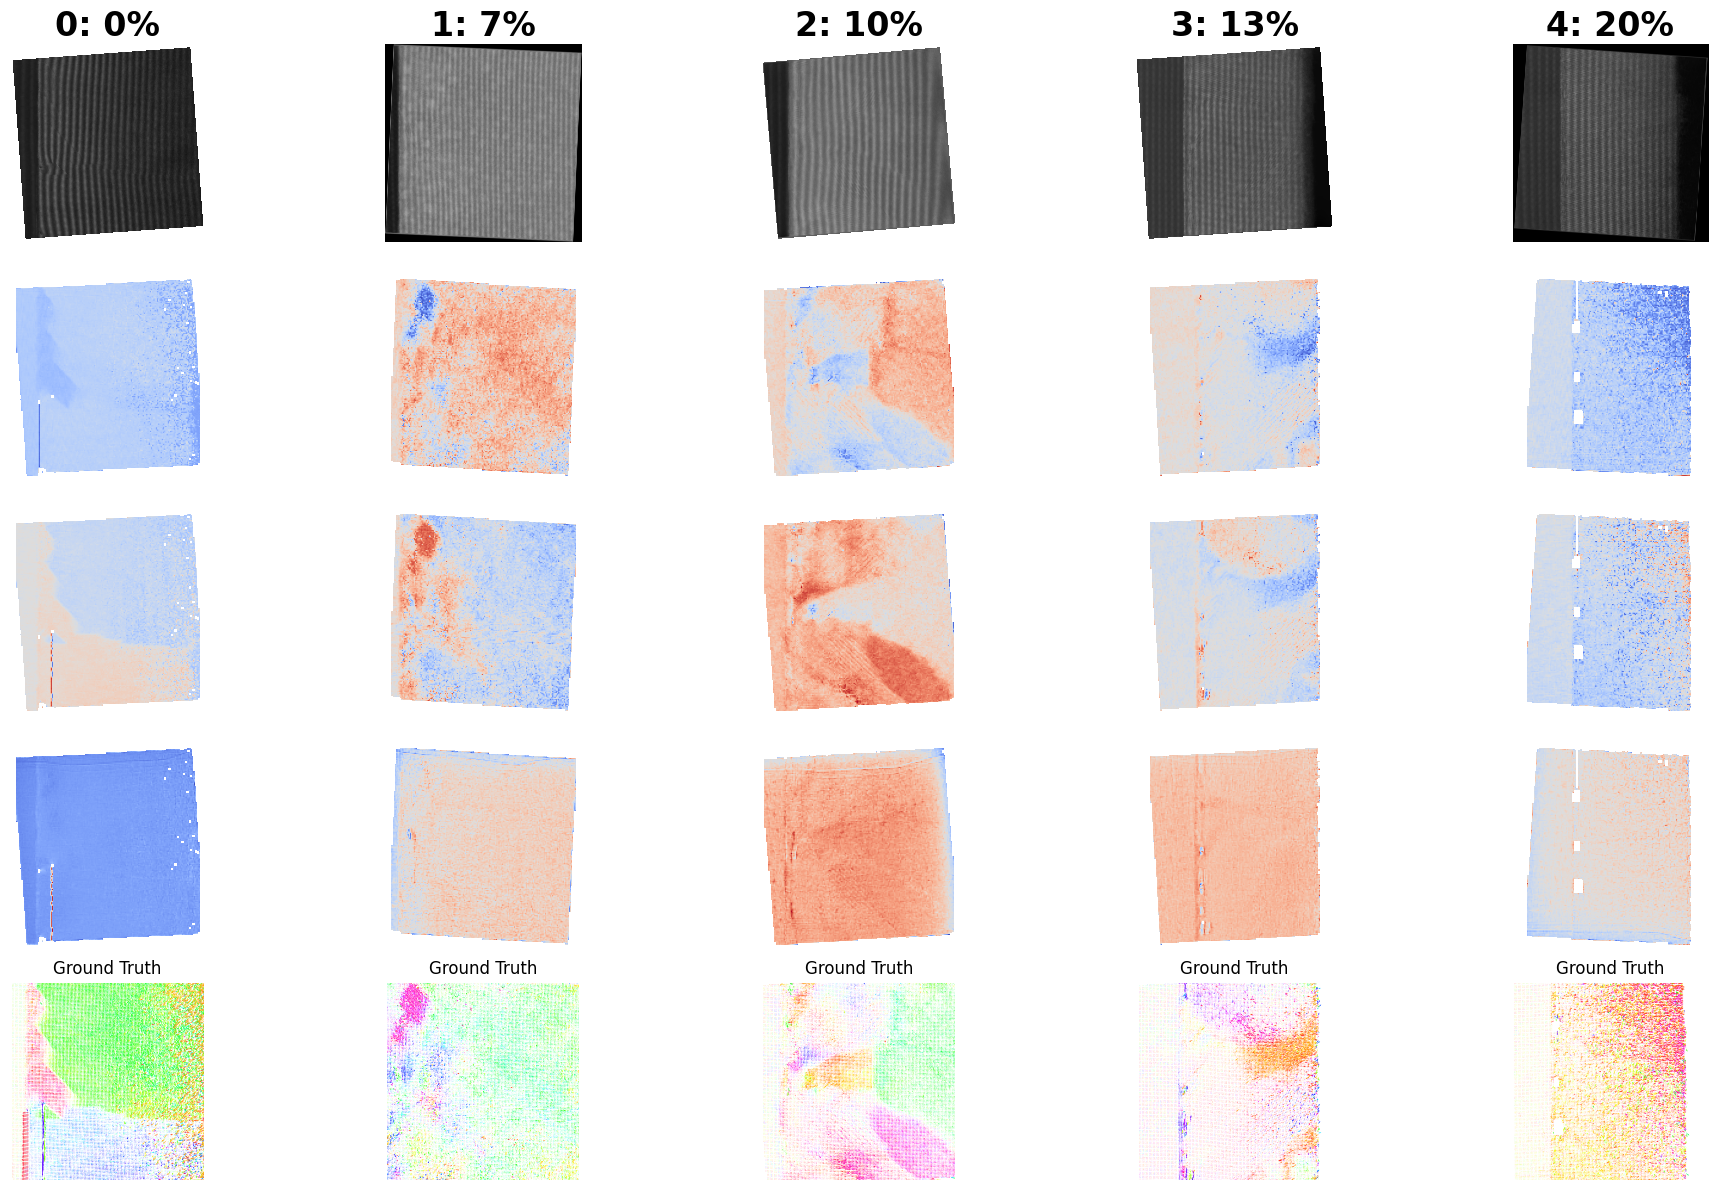

In [3]:
utils.plt_ground_truth(SBFOdata)

## chip image

plot a few example chips

Number of subimages removed due to size mismatch: 231
Number of subimages removed due to NaNs: 160


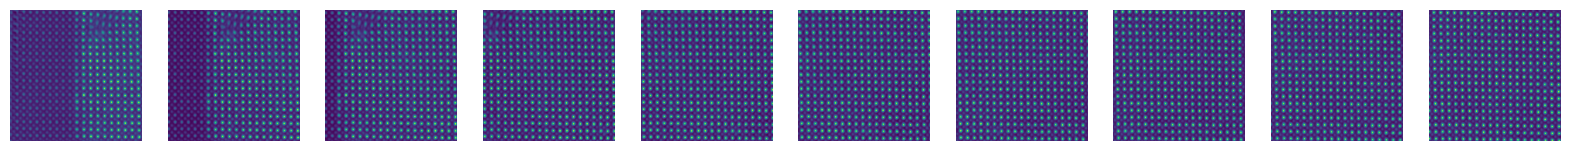

In [4]:
chip_width  = 500
chip_height = 500
step_size   = 100
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)

# plot ex chips
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for i, image in enumerate(imstack_grid):
    ax[i].imshow(image)
    ax[i].set_axis_off()
    if i == 9:
        break

# 3 Different Clustering Methods

## kmeans

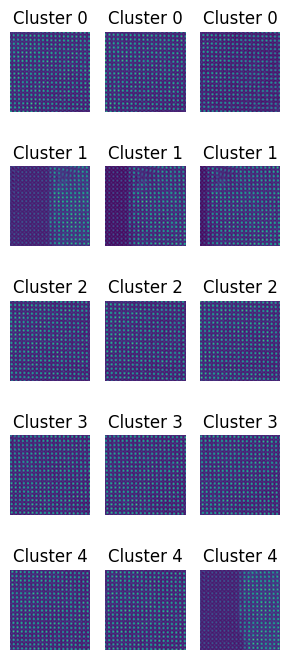

cluster 0 size: 198
cluster 1 size: 318
cluster 2 size: 216
cluster 3 size: 231
cluster 4 size: 246


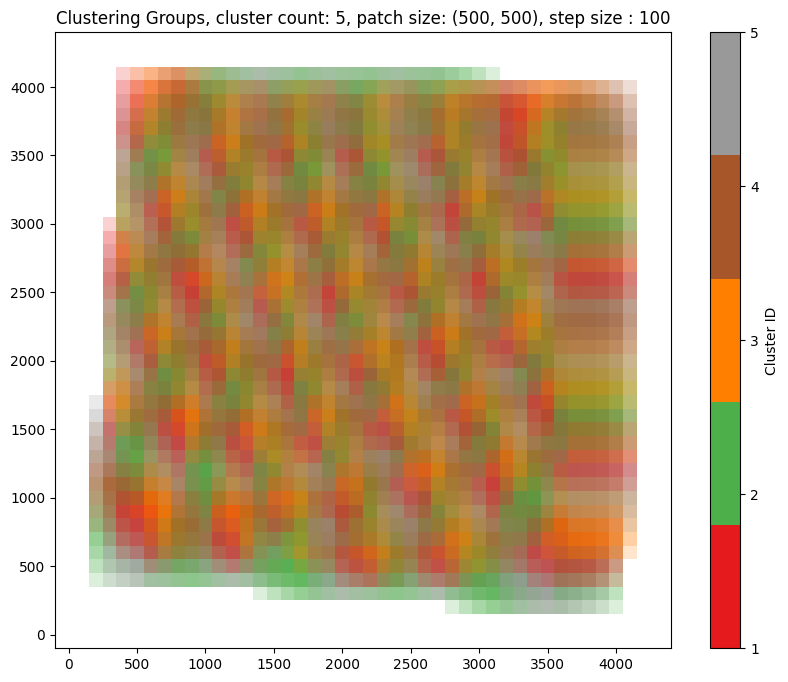

In [5]:
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

#### try a different chip and step sizes

Number of subimages removed due to size mismatch: 1173
Number of subimages removed due to NaNs: 5474


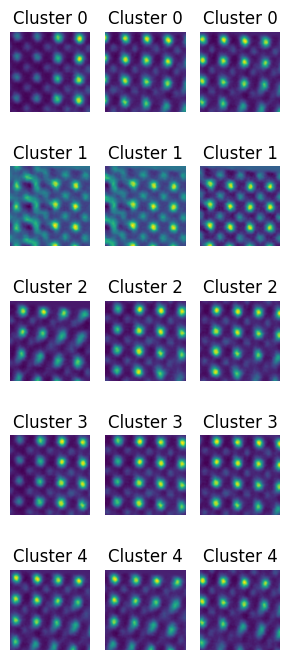

cluster 0 size: 4951
cluster 1 size: 12260
cluster 2 size: 5007
cluster 3 size: 5003
cluster 4 size: 4940


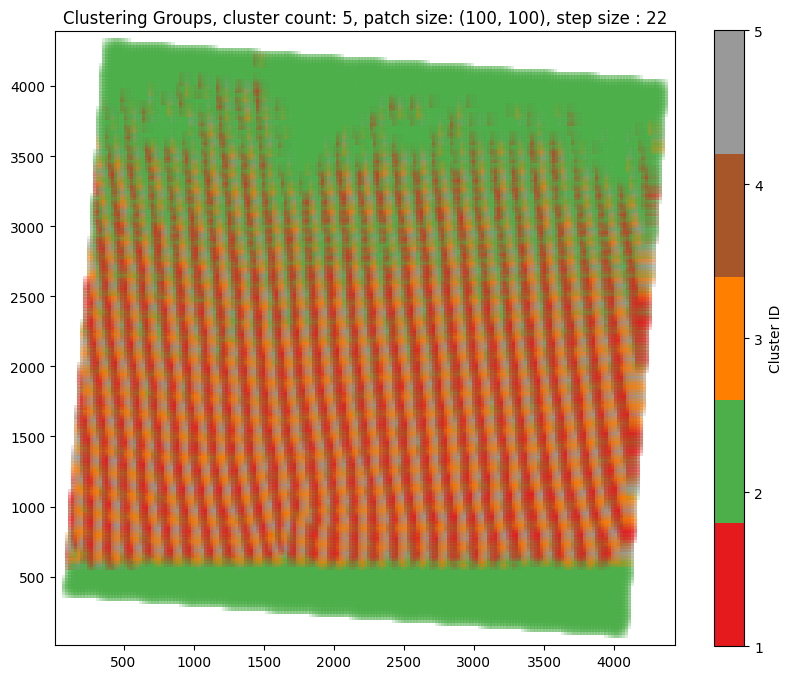

In [7]:
chip_width  = 100
chip_height = 100
step_size   = 22
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

Number of subimages removed due to size mismatch: 2622
Number of subimages removed due to NaNs: 29744


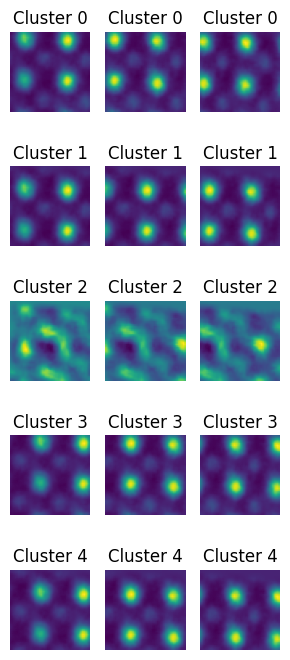

cluster 0 size: 24248
cluster 1 size: 24302
cluster 2 size: 62895
cluster 3 size: 24313
cluster 4 size: 24152


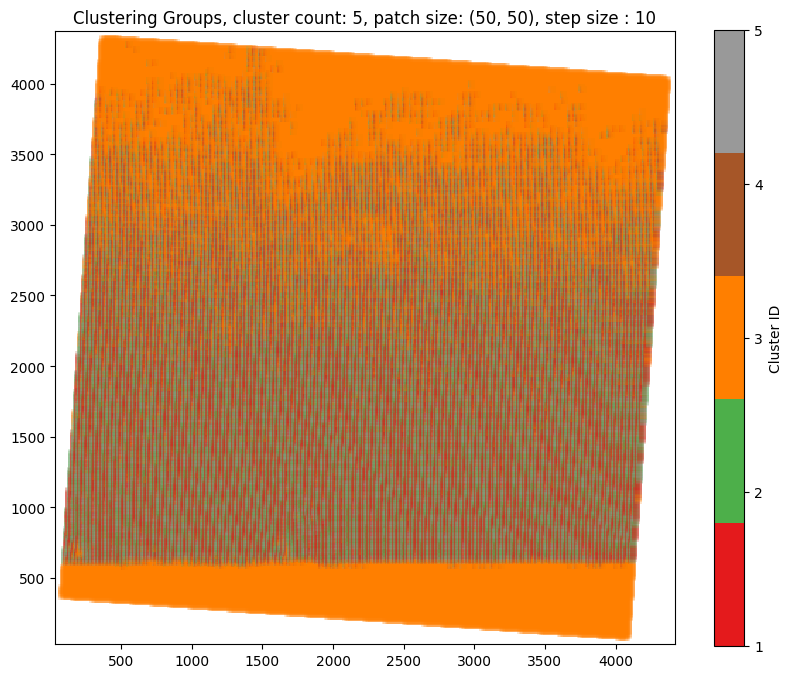

In [7]:
chip_width  = 50
chip_height = 50
step_size   = 10
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

## Louvain

## Agglomerative 